   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4118d1f400>]],
      dtype=object)

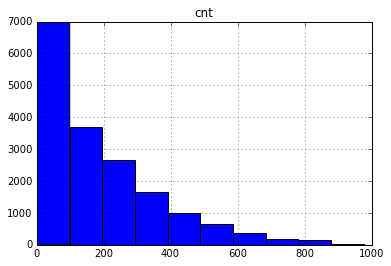

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

bike_rentals = pd.read_csv('bike_rental_hour.csv')
print(bike_rentals.head())
bike_rentals.hist('cnt')

In [35]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [36]:
def assign_label(num):
    if (num >= 6) & (num < 12):
        return 1
    elif (num >= 12) & (num < 18):
        return 2
    elif (num >= 18) & (num < 24):
        return 3
    else:
        return 4

In [37]:
time_label = bike_rentals['hr'].apply(lambda x: assign_label(x))
bike_rentals['time_label'] = time_label

In [38]:
train = bike_rentals.sample(frac=.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

lr = LinearRegression()
lr.fit(train[predictors], train['cnt'])
predictions = lr.predict(test[predictors])
mse = mean_squared_error(test['cnt'], predictions)
print(mse)

17601.863381833995


In [40]:
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor(min_samples_leaf=2)
dtreg.fit(train[predictors], train['cnt'])
predictions = dtreg.predict(test[predictors])
mse = mean_squared_error(test['cnt'], predictions)
print(mse)

2559.9063898478453


In [41]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(min_samples_leaf=5, n_estimators=100)
rfreg.fit(train[predictors], train['cnt'])
predictions = rfreg.predict(test[predictors])
mse = mean_squared_error(test['cnt'], predictions)
print(mse)

1657.8552682777638


Random forest makes the best predictions and linear regression makes the least accurate predictions